In [0]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [4]:
# reading data
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
train.head()
train.shape

(17000, 9)

In [5]:
test = pd.read_csv("/content/sample_data/california_housing_test.csv")
test.head()
#X_test.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [6]:
# seperating target label from data
X_train = train.drop("median_house_value",axis=1)
y_train = train["median_house_value"]
print(X_train.shape)
print(y_train.shape)

(17000, 8)
(17000,)


In [7]:
X_test = test.drop("median_house_value",axis=1)
y_test = test["median_house_value"]
print(X_test.shape)
print(y_test.shape)

(3000, 8)
(3000,)


In [0]:
# standardize data
def standardize(data):
  return (data-np.mean(data)) / np.std(data)

In [9]:
scaler = preprocessing.StandardScaler()
names = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=names)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


In [10]:
scaler = preprocessing.StandardScaler()
names = X_test.columns
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=names)
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.233729,0.814633,-0.147000,0.596418,0.315337,0.130246,0.317734,1.510745
1,0.646344,-0.645931,1.127565,-0.505550,-0.529255,-0.576296,-0.582743,-0.112324
2,0.892007,-0.871356,-0.147000,0.459078,-0.055225,0.078808,0.013926,1.071149
3,0.616263,-0.852570,-0.067340,-1.175083,-1.239098,-1.313894,-1.310788,1.255865
4,-0.040509,0.326213,-0.784282,-0.630362,-0.688068,-0.536504,-0.692223,-0.469081


In [0]:
# Build the linear regression model
# y = w*X + b
# mean square error = (1/num_samples)*sum (actual - predicted)^2
# gradient = (1/num_samples)*(transposed X *(predicted-actual))
# weight_new = weight_old - learning_rate * gradient of weight
# bias_new =  bias_old - learning_rate * gradient of bias
# define learning rate and number of iterations

In [0]:
# predict function
def predict(X,w,b):
  return np.dot(X,w) + b

In [0]:
# error measure
def mse(actual,predicted):
  return np.mean((actual-predicted)**2)
def SSE(actual,predicted):
  return np.sum((actual - predicted)**2)

In [0]:
# train the model "fitting"
# initialize weight and bias
# make an error list
# iterate to perform gradient decsent
    # inside the for loop:
    # predict
    # calculate gradients
    # update weights and bias using gradients
    # obtain error measure and return results
def fit(X,y,learning_rate,iterations):
  num_samples,num_features = X.shape
  weights = np.zeros(num_features)
  bias = 0.0
  error_history = []
  for iter in range(iterations):
    print ('iteration: ',iter)
    y_predicted = predict(X,weights,bias)

    grad_weights = (1/num_samples)*np.dot(X.T,(y_predicted-y))
    grad_bias =  (1/num_samples)*np.sum(y_predicted-y)

    weights = weights - learning_rate * grad_weights 
    bias =    bias - learning_rate * grad_bias

    error = mse(y,y_predicted)
    print(error)
    error_history.append(error)
  return weights,bias,error_history   

iteration:  0
56425110555.93047
iteration:  1
55426265655.43441
iteration:  2
54447449046.47516
iteration:  3
53488245678.61674
iteration:  4
52548249995.82939
iteration:  5
51627065655.05503
iteration:  6
50724305257.37465
iteration:  7
49839590091.00716
iteration:  8
48972549885.397095
iteration:  9
48122822575.72494
iteration:  10
47290054077.20376
iteration:  11
46473898068.584145
iteration:  12
45674015784.32444
iteration:  13
44890075814.915764
iteration:  14
44121753914.9049
iteration:  15
43368732818.1657
iteration:  16
42630702060.02661
iteration:  17
41907357805.86492
iteration:  18
41198402685.82295
iteration:  19
40503545635.32004
iteration:  20
39822501741.04664
iteration:  21
39154992092.16467
iteration:  22
38500743636.44346
iteration:  23
37859489041.08434
iteration:  24
37230966558.00234
iteration:  25
36614919893.34878
iteration:  26
36011098081.071144
iteration:  27
35419255360.32303
iteration:  28
34839151056.54384
iteration:  29
34270549466.043213
iteration:  30
33

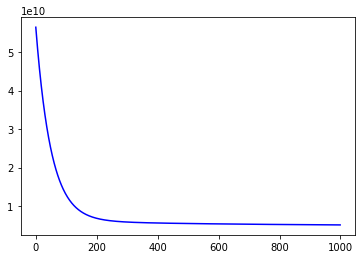

In [0]:
# use the obtained model
learning_rate = 0.01
iterations = 1000
w,b,err =fit(X_train,y_train,learning_rate,iterations)
plt.plot(range(iterations),err,color='blue')
plt.show()

In [0]:
print(w)
print(b)

[-43380.87670602 -48698.5748263   20379.07086698  -5314.47908852
  22577.0636215  -32476.39420794  22635.02135468  79219.50822346]
207291.96291396525


In [0]:
testing = predict(X_test,w,b)
training = predict(X_train,w,b)

In [0]:
measure = np.sqrt(mse(y_test,testing))
print(measure)

71759.49626564262


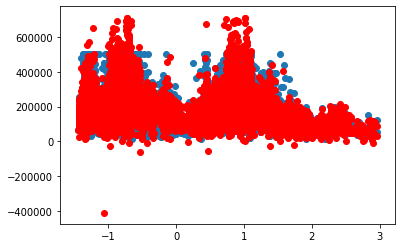

In [0]:
plt.scatter(X_train.iloc[:,1],y_train)
plt.scatter(X_train.iloc[:,1], training,color = "red")
plt.show()

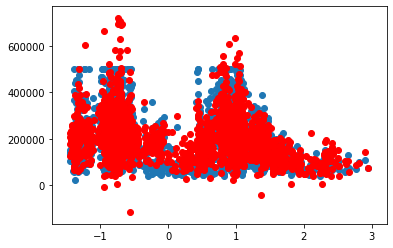

In [0]:
plt.scatter(X_test.iloc[:,1],y_test)
plt.scatter(X_test.iloc[:,1], testing,color = "red")
plt.show()

In [13]:
from numpy import linalg as LA
alpha = LA.inv(X_train.T @ X_train ) @ X_train.T @ y_train.T
alpha = LA.lstsq(X_train,y_train)
print(alpha)

(array([-86499.60728227, -91744.05083062,  14483.29860201, -18263.60700748,
        49587.33777166, -44178.15153005,  17470.57604338,  77291.55314914]), array([8.12569254e+14]), 8, array([257.87304959, 180.04632642, 135.03355384, 118.2899489 ,
        49.43478583,  37.14803954,  28.14800292,  15.56126612]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
